# Partial Autocorrelation



## What is Partial Autocorrelation?


We can begin by explaining partial correlation. This is the correlation between two random variables whilst controlling the effect of another (orm more) random variable that affects the original variables we are correlating.

Lets say we have three random variables of X, Y and Z. The partial correlation between X and Y, excluding the effects of Z, is mathematically:

$$
r_{(X,Y),Z} = 
\frac{r_{XY} - r_{XZ} r_{YZ}}
{\sqrt{(1 - r_{XZ}^2)(1 - r_{YZ}^2)}}
$$

Where r is the correlation coefficient that ranges between -1 and 1.

Partial autocorrelation is then simply just the partial correlation of a time series at two different states in time. Taking it one step further, it is the correlation between the time series at two different lags not considering the effect of any intermediate lags. For example, the partial autocorrelation for a lag of 2 is only the correlation that lag 1 didn’t explain.

## Why is it Useful?


Unlike autocorrelation, partial autocorrelation hasn’t got as my uses for time series analysis. However, its main and very important impact comes in when building forecasting models.

The PACF is used to estimate the number/order of autoregressive components when fitting Autoregressive, ARMA or ARIMA models as defined by the Box-Jenkins procedure. These models are probably the most used and often provide the best results when training a forecasting model.

## Python Example

In [1]:
# Import packaged
import plotly.express as px
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import kagglehub

/Users/amirashrafizham/Desktop/Machine Learning Projects/time-series/time-series-models/statisticalmodel/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


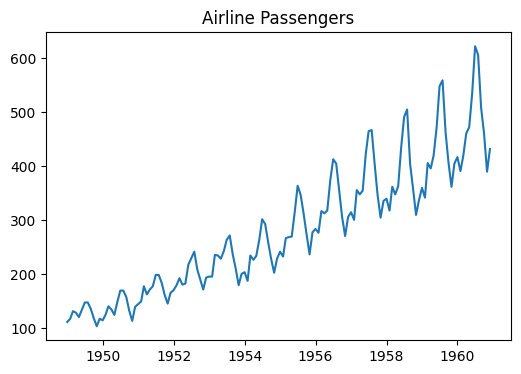

In [3]:
# Read in the data
path = kagglehub.dataset_download("ashfakyeafi/air-passenger-data-for-time-series-analysis")
data = pd.read_csv(path + "/AirPassengers.csv")

data.index = pd.to_datetime(data.index)

# Plot the data
def plotting(title, data, x, y, x_label, y_label):
    """General function to plot the passenger data (Matplotlib version)."""
    data[x] = pd.to_datetime(data['Month'])
    plt.figure(figsize=(6, 4))
    plt.plot(data[x], data[y])
    plt.title(title)

    #plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

plotting('Airline Passengers', data, 'Month', '#Passengers', 'Date', 'Passengers')

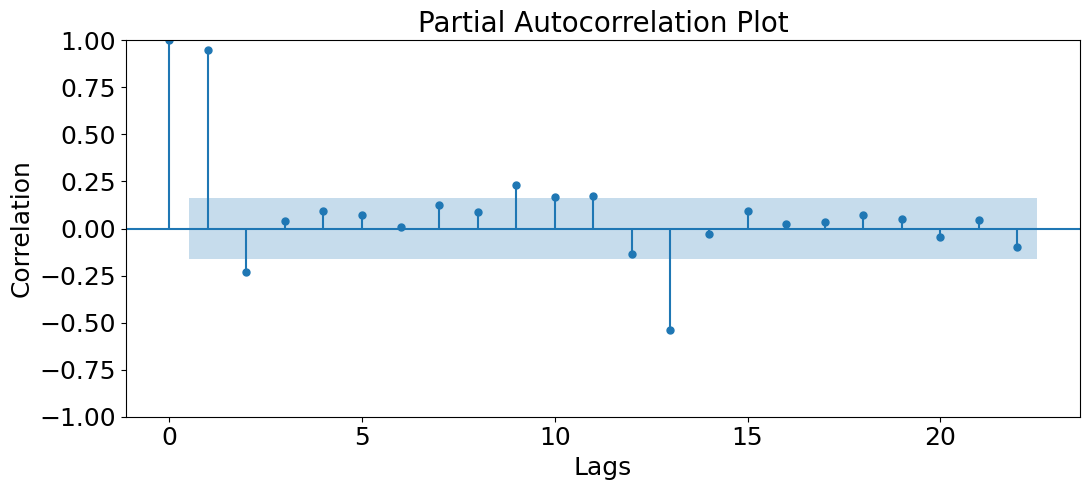

In [4]:
# Plot partial autocorrelation
plt.rc("figure", figsize=(11,5))
plot_pacf(data['#Passengers'], method='ywm')
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Partial Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

We see that lag 1 is highly correlated and there are other highly correlated lags later in time which are probably due to seasonal affects.

However, from this plot it is quite unclear how many autoregressors we would choose if we were building a forecasting model. Therefore, it is often recommended to simply carry out a grid-search over the possible parameters using modelling packages such as auto arima.


The blue region is where lags are no longer statistically significant. We typically choose the number autoregressors by seeing how many of them are above the blue region.